In [27]:
import numpy as np

In [28]:
data = np.loadtxt("data/key_states_layer_10.txt")
print(data.shape)

(5159, 1024)


In [29]:
data_norm = data / data.sum(axis=1, keepdims=True)
data_norm[:5,:]

array([[0.00046427, 0.00046835, 0.00146161, ..., 0.00147675, 0.0004883 ,
        0.00049722],
       [0.00145619, 0.00048411, 0.0004699 , ..., 0.00146576, 0.0004889 ,
        0.00147822],
       [0.00046974, 0.00145064, 0.00145501, ..., 0.00048134, 0.00048722,
        0.00146816],
       [0.00141635, 0.00140026, 0.00046293, ..., 0.00047285, 0.00047523,
        0.00143184],
       [0.00144769, 0.00144043, 0.00047656, ..., 0.00145312, 0.00046755,
        0.00146355]])

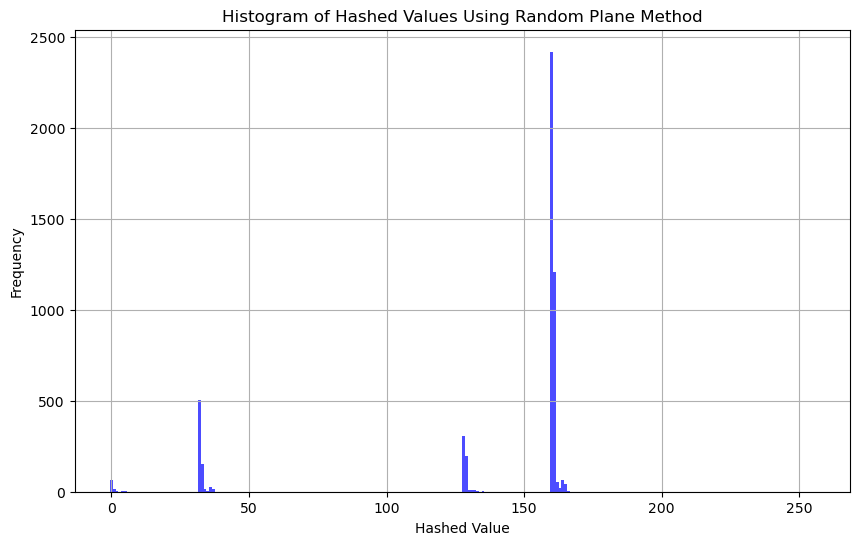

In [30]:
import matplotlib.pyplot as plt

# Parameters
num_planes = 8  # Number of random hyperplanes for hashing (number of bits in hash)

# Assuming 'data' is your array with shape (334, 1024)
# Simulate random hyperplanes
np.random.seed(3)  # For reproducibility
random_planes = np.random.randn(num_planes, data.shape[1])  # Random planes of shape (num_planes, 1024)

def random_plane_hash(vector, planes):
    # Compute the dot product of the vector with each plane
    dot_products = np.dot(planes, vector.T)  # Shape: (num_planes,)
    
    # Generate a hash by taking the sign of each dot product
    # Assign 1 for positive dot product, 0 for negative
    return np.where(dot_products >= 0, 1, 0)

# Compute hashes for all rows
hashes = np.array([random_plane_hash(row, random_planes) for row in data_norm])
powers_of_two = 2 ** np.arange(num_planes)[::-1]  # [8, 4, 2, 1] for 4-bit hash
hashed_values = np.dot(hashes, powers_of_two)

# Display the first few hashes
plt.figure(figsize=(10, 6))
plt.hist(hashed_values, bins=np.arange(2**num_planes+1) - 0.5, color='blue', alpha=0.7)
# plt.xticks(np.arange(2**num_planes))  # Ensure the x-axis only shows integers between 0 and 15
plt.title('Histogram of Hashed Values Using Random Plane Method')
plt.xlabel('Hashed Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [31]:
vals, counts = np.unique(hashed_values, return_counts=True)

In [32]:
tuples = [(count, val) for val, count in zip(vals, counts)]

In [33]:
tuples

[(65, 0),
 (15, 1),
 (2, 2),
 (1, 3),
 (5, 4),
 (2, 5),
 (504, 32),
 (155, 33),
 (14, 34),
 (2, 35),
 (24, 36),
 (16, 37),
 (305, 128),
 (196, 129),
 (9, 130),
 (7, 131),
 (10, 132),
 (6, 133),
 (2, 135),
 (2420, 160),
 (1208, 161),
 (55, 162),
 (23, 163),
 (67, 164),
 (43, 165),
 (2, 166),
 (1, 167)]

### Normal distribution

In [110]:
sorted_tuples = sorted(tuples, key=lambda x: x[0])

# Create a new list for rearranged data in bell curve order
n = len(sorted_tuples)
rearranged_data = [None] * n

# Place elements symmetrically around the center
for i in range(n // 2):
    rearranged_data[i] = sorted_tuples[2*i]
    rearranged_data[n - i - 1] = sorted_tuples[2*i+1]

# If there's an odd number of elements, place the middle element
if n % 2 != 0:
    rearranged_data[n // 2] = sorted_tuples[-1]

# Output the rearranged data
print(rearranged_data)

[(1, 3), (2, 2), (2, 35), (2, 166), (6, 133), (9, 130), (14, 34), (16, 37), (24, 36), (55, 162), (67, 164), (196, 129), (504, 32), (2420, 160), (1208, 161), (305, 128), (155, 33), (65, 0), (43, 165), (23, 163), (15, 1), (10, 132), (7, 131), (5, 4), (2, 135), (2, 5), (1, 167)]


mean = 13.274665632874589, std = 1.7672144378095986, length = 5159


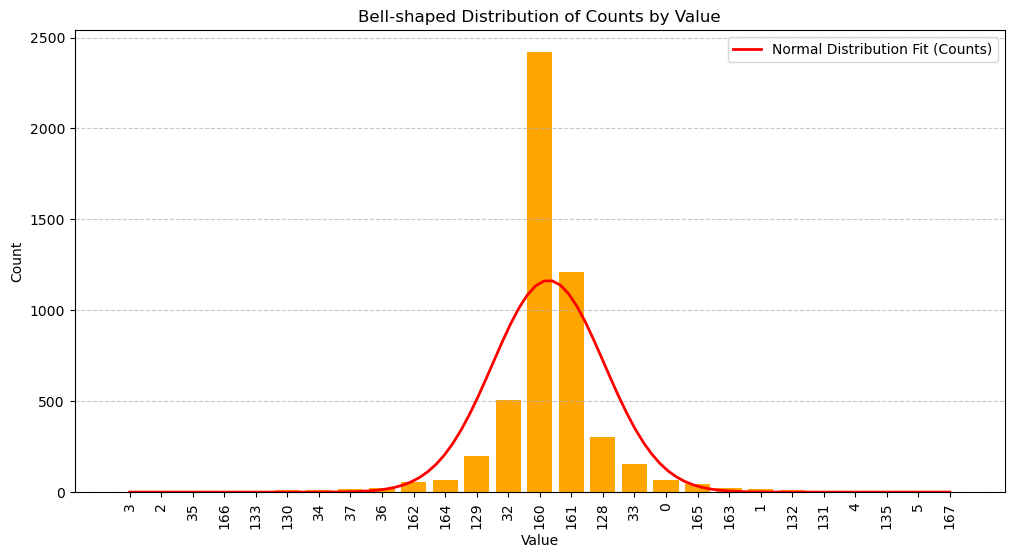

In [112]:
import scipy.stats as stats
from scipy.stats import norm

counts = [count for count, value in rearranged_data]
values = [value for count, value in rearranged_data]

expanded_data = []
for i, tup in enumerate(rearranged_data):
    expanded_data.extend([i] * tup[0])

# Calculate the mean and standard deviation of the expanded data for normal distribution fitting
mean, std_dev = norm.fit(expanded_data)
print(f'mean = {mean}, std = {std_dev}, length = {len(expanded_data)}')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), counts, tick_label=values, color='orange')

# normal distribution
x_values = np.linspace(min(expanded_data), max(expanded_data), 100)
y_values = norm.pdf(x_values, mean, std_dev) * len(expanded_data)
plt.plot(x_values, y_values, 'r', linewidth=2, label="Normal Distribution Fit (Counts)")

plt.title("Bell-shaped Distribution of Counts by Value")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Exponential Distribution

In [157]:
sorted_tuples = sorted(tuples, key=lambda x: -x[0])

loc = 0.0, scale = 1.616010854816825


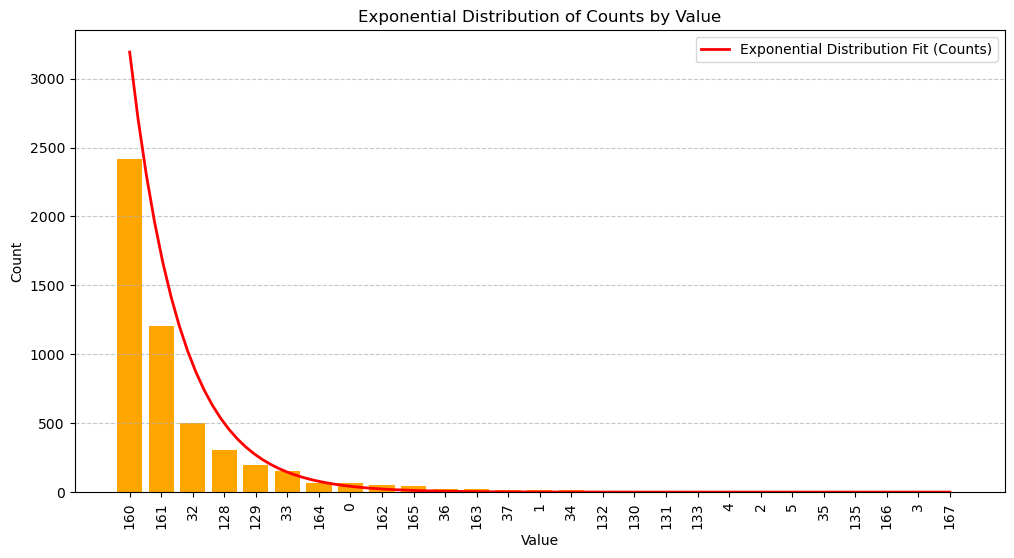

In [163]:
from scipy.stats import expon

counts = [count for count, value in sorted_tuples]
values = [value for count, value in sorted_tuples]

expanded_data = []
for i, tup in enumerate(sorted_tuples):
    expanded_data.extend([i] * tup[0])

plt.figure(figsize=(12, 6))

# Calculate the mean and standard deviation of the expanded data for normal distribution fitting
loc, scale = expon.fit(expanded_data)
print(f'loc = {loc}, scale = {scale}')

x_values = np.linspace(min(expanded_data), max(expanded_data), 100)
y_values = expon.pdf(x_values, loc, scale) * len(expanded_data)
plt.plot(x_values, y_values, 'r', linewidth=2, label="Exponential Distribution Fit (Counts)")

plt.bar(range(len(values)), counts, tick_label=values, color='orange')

plt.title("Exponential Distribution of Counts by Value")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Weibull

In [140]:
sorted_tuples = sorted(tuples, key=lambda x: -x[0])

c = 145174381.01556474, loc = 185250748.39482832, scale = 185250747.75242007


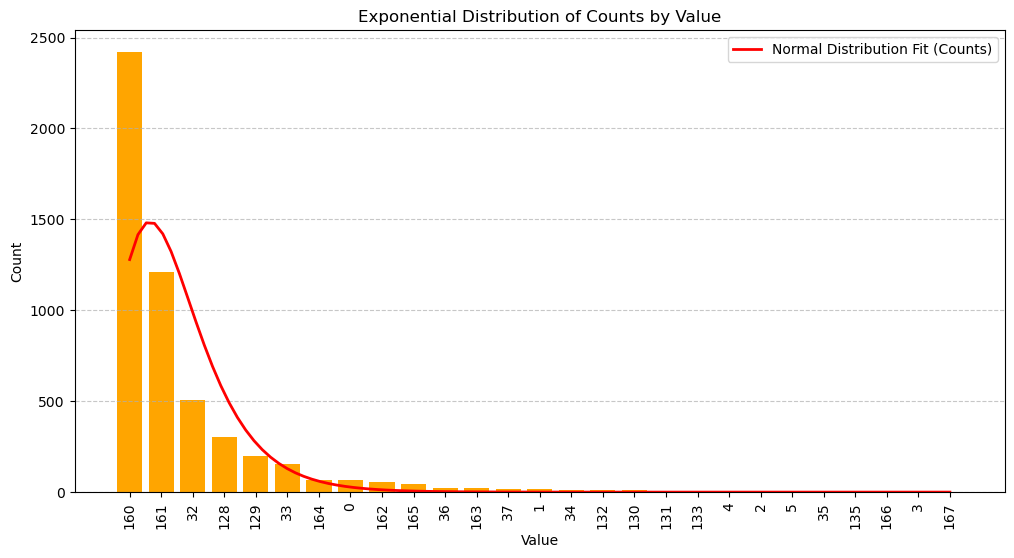

In [150]:
from scipy.stats import weibull_max

counts = [count for count, value in sorted_tuples]
values = [value for count, value in sorted_tuples]

expanded_data = []
for i, tup in enumerate(sorted_tuples):
    expanded_data.extend([i] * tup[0])

plt.figure(figsize=(12, 6))

# Calculate the mean and standard deviation of the expanded data for normal distribution fitting
c, loc, scale = weibull_max.fit(expanded_data)
print(f'c = {c}, loc = {loc}, scale = {scale}')

x_values = np.linspace(min(expanded_data), max(expanded_data), 100)
y_values = weibull_max.pdf(x_values, c, loc, scale) * len(expanded_data)
plt.plot(x_values, y_values, 'r', linewidth=2, label="Normal Distribution Fit (Counts)")

plt.bar(range(len(values)), counts, tick_label=values, color='orange')

plt.title("Exponential Distribution of Counts by Value")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Exponential power

In [151]:
sorted_tuples = sorted(tuples, key=lambda x: -x[0])

loc = 0.4253096629983688, scale = -8.109852248207151e-29, shape = 12.356943141225674


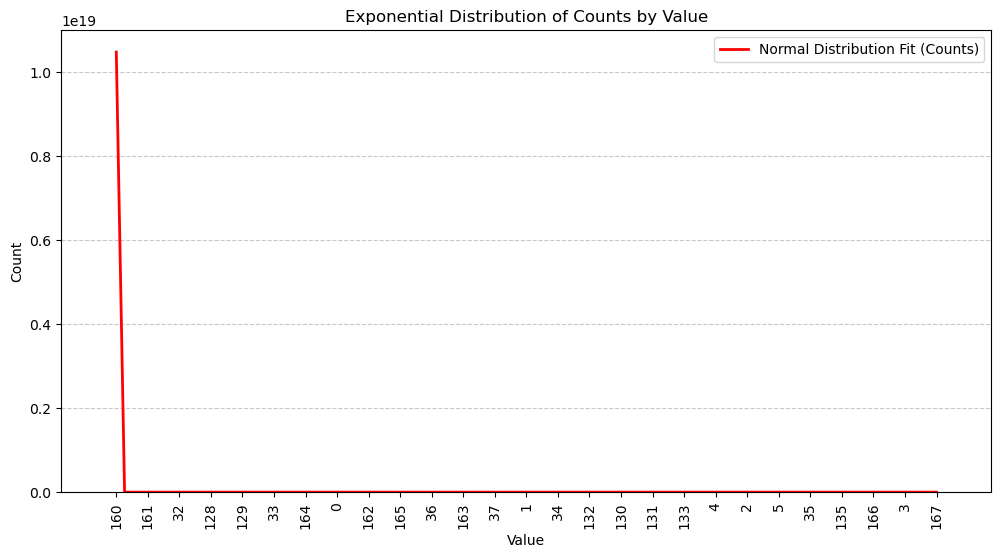

In [156]:
from scipy.stats import exponpow

counts = [count for count, value in sorted_tuples]
values = [value for count, value in sorted_tuples]

expanded_data = []
for i, tup in enumerate(sorted_tuples):
    expanded_data.extend([i] * tup[0])

plt.figure(figsize=(12, 6))

# Calculate the mean and standard deviation of the expanded data for normal distribution fitting
loc, scale, shape = exponpow.fit(expanded_data)
print(f'loc = {loc}, scale = {scale}, shape = {shape}')

x_values = np.linspace(min(expanded_data), max(expanded_data), 100)
y_values = exponpow.pdf(x_values, loc, scale, shape) * len(expanded_data)
plt.plot(x_values, y_values, 'r', linewidth=2, label="Normal Distribution Fit (Counts)")

plt.bar(range(len(values)), counts, tick_label=values, color='orange')

plt.title("Exponential Distribution of Counts by Value")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [153]:
from scipy.stats import exponpow
exponpow.fit(expanded_data)

(0.4253096629983688, -8.109852248207151e-29, 12.356943141225674)

### Paddle

In [73]:
import os
os.environ['GLOG_minloglevel'] = '10000'
import paddle
import paddle.nn.functional as F

In [106]:
key_states = paddle.zeros((1,2,4,3), dtype='float32')   #(b, slen, head, dim)
key_states[:,0,0] = paddle.to_tensor([1,2,3])
key_states[:,0,1] = paddle.to_tensor([1,2,3])
key_states[:,0,2] = paddle.to_tensor([10,11,12])
key_states[:,0,3] = paddle.to_tensor([10,11,12])

key_states[:,1,0] = paddle.to_tensor([9,8,7])
key_states[:,1,1] = paddle.to_tensor([9,8,7])
key_states[:,1,2] = paddle.to_tensor([4,5,6])
key_states[:,1,3] = paddle.to_tensor([4,5,6])
key_states

Tensor(shape=[1, 2, 4, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[[1. , 2. , 3. ],
          [1. , 2. , 3. ],
          [10., 11., 12.],
          [10., 11., 12.]],

         [[9. , 8. , 7. ],
          [9. , 8. , 7. ],
          [4. , 5. , 6. ],
          [4. , 5. , 6. ]]]])

In [118]:
paddle.seed(3)
hash_planes = paddle.randn((2, 3), dtype='float32')

In [108]:
hash_bits = paddle.matmul(key_states, hash_planes, transpose_y=True)
hash_bits = paddle.where(hash_bits >= 0, 1, 0)
hash_bits

Tensor(shape=[1, 2, 4, 2], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[[0, 1],
          [0, 1],
          [0, 1],
          [0, 1]],

         [[0, 0],
          [0, 0],
          [0, 1],
          [0, 1]]]])

In [102]:
hash_bits[0,0,2] = paddle.to_tensor([1,1])
hash_bits[0,0,3] = paddle.to_tensor([1,1])
hash_bits

Tensor(shape=[1, 1, 4, 2], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[[0, 1],
          [0, 1],
          [1, 1],
          [1, 1]]]])

In [109]:
powers_of_two = 2 ** paddle.arange(2)[::-1]
powers_of_two

Tensor(shape=[2], dtype=int64, place=Place(cpu), stop_gradient=True,
       [2, 1])

In [110]:
hash_vals = paddle.matmul(hash_bits, powers_of_two)
hash_vals

Tensor(shape=[1, 2, 4], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[1, 1, 1, 1],
         [0, 0, 1, 1]]])

In [112]:
paddle.transpose(hash_vals,[0,2,1])

Tensor(shape=[1, 4, 2], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[1, 0],
         [1, 0],
         [1, 1],
         [1, 1]]])

In [ ]:
def random_plane_hash(key_states):
        global hash_planes
        hash_bits = paddle.matmul(key_states, hash_planes, transpose_y=True) # Shape: (num_planes, hiddenlen)
        hash_bits = paddle.where(hash_bits >= 0, 1, 0)
        powers_of_two = 2 ** paddle.arange(8)[::-1]
        hash_vals = paddle.matmul(hash_bits, powers_of_two)
        hash_vals = paddle.reshape(hash_vals, [-1, hash_vals.shape[2], hash_vals.shape[1]])
        print(hash_vals)

In [88]:
random_plane_hash(key_states)

Tensor(shape=[1, 24, 20], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[27 , 24 , 252, 27 , 83 , 181, 80 , 106, 164, 45 , 118, 168, 185, 215,
          209, 64 , 82 , 234, 66 , 252],
         [22 , 163, 5  , 185, 210, 95 , 34 , 128, 224, 111, 129, 204, 224, 2  ,
          80 , 231, 29 , 191, 227, 109],
         [191, 145, 115, 6  , 49 , 81 , 11 , 245, 163, 174, 148, 50 , 230, 230,
          194, 132, 233, 19 , 187, 90 ],
         [2  , 180, 149, 152, 121, 6  , 116, 19 , 3  , 45 , 18 , 226, 38 , 66 ,
          191, 201, 247, 99 , 251, 52 ],
         [97 , 251, 162, 138, 38 , 132, 9  , 104, 57 , 7  , 109, 160, 138, 132,
          120, 122, 9  , 254, 38 , 167],
         [200, 24 , 1  , 60 , 203, 130, 71 , 250, 61 , 72 , 115, 130, 239, 202,
          11 , 178, 248, 81 , 36 , 30 ],
         [9  , 115, 157, 44 , 87 , 148, 37 , 247, 5  , 79 , 69 , 210, 123, 125,
          71 , 63 , 101, 144, 91 , 135],
         [47 , 232, 211, 67 , 252, 107, 4  , 250, 49 , 29 , 97 , 20 , 26 , 1

Tensor(shape=[19], dtype=int64, place=Place(cpu), stop_gradient=True,
       [2  , 5  , 20 , 33 , 34 , 44 , 46 , 55 , 69 , 76 , 87 , 157, 161, 169,
        186, 187, 204, 210, 234])
Tensor(shape=[19], dtype=float64, place=Place(cpu), stop_gradient=True,
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.])
Tensor(shape=[19], dtype=float64, place=Place(cpu), stop_gradient=True,
       [0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158])
Tensor(shape=[10], dtype=int64, place=Place(cpu), stop_gradient=True,
       [5 , 13, 16, 17, 10, 11, 6 , 14, 4 , 9 ])


In [132]:
attn_scores = paddle.randn((1,24,1,20), dtype='float32')

In [129]:
attn_sum = None

In [130]:
summation = paddle.sum(attn_scores, axis = 2)

if attn_sum is None:
    attn_sum = summation
else:
    attn_sum += summation[:, :, :attn_sum.shape[-1]]
    q_len = summation.shape[-1] - attn_sum.shape[-1]
    new_in = attn_scores[:, :, q_len:]
    attn_sum = paddle.concat([attn_sum, new_in], axis=2)

In [131]:
attn_sum.shape

[1, 24, 19]

In [138]:
attn_sum += summation[:, :, :attn_sum.shape[-1]]
attn_sum.shape

[1, 24, 19]

In [135]:
q_len = summation.shape[-1] - attn_sum.shape[-1]

In [141]:
new_in = summation[:, :, -q_len:]
new_in.shape

[1, 24, 1]

In [142]:
attn_sum = paddle.concat([attn_sum, new_in], axis=2)
attn_sum.shape

[1, 24, 20]

In [143]:
hash_val = paddle.rand((1, 24, 23))
hash_val.shape

[1, 24, 23]

In [144]:
evict_hash = hash_val[:,:,2:-1]
evict_hash.shape

[1, 24, 20]

In [216]:
evict_hash = paddle.to_tensor([[[1,1,2,2],[4,6,6,6]]]) # 2 head, 4 hashes
evict_hash.shape

[1, 2, 4]

In [230]:
unique_values, counts = paddle.unique(evict_hash[:, 1, :], return_counts=True)
unique_values, counts

(Tensor(shape=[2], dtype=int64, place=Place(cpu), stop_gradient=True,
        [4, 6]),
 Tensor(shape=[2], dtype=int64, place=Place(cpu), stop_gradient=True,
        [1, 3]))

In [231]:
probabilities = counts.astype("float32") / counts.sum()
probabilities

Tensor(shape=[2], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.25000000, 0.75000000])

In [237]:
scores = paddle.to_tensor([[[0.8,0.2,0.4,0.6],[0.8,0.5,0.3,0.7]]])
scores

Tensor(shape=[1, 2, 4], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[0.80000001, 0.20000000, 0.40000001, 0.60000002],
         [0.80000001, 0.50000000, 0.30000001, 0.69999999]]])

In [262]:
i = 1
hash_to_id = {}
for value in unique_values:
    indices = paddle.where(evict_hash[:, i, :] == value)[1]
    indices = indices.flatten()
    print(indices)
    # sort by attn_score from low to high
    selected_scores = paddle.gather(scores[:, i, :].flatten(), indices)
    print(selected_scores)
    sorted_indices = paddle.argsort(selected_scores)
    print(sorted_indices)
    sorted_index = paddle.gather(indices, sorted_indices)
    print(sorted_index)
    hash_to_id[int(value.numpy())] = sorted_index
    print("------------------")
hash_to_id

Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=True,
       [0])
Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.80000001])
Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=True,
       [0])
Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=True,
       [0])
------------------
Tensor(shape=[3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [1, 2, 3])
Tensor(shape=[3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.50000000, 0.30000001, 0.69999999])
Tensor(shape=[3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [1, 0, 2])
Tensor(shape=[3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [2, 1, 3])
------------------


{4: Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=True,
        [0]),
 6: Tensor(shape=[3], dtype=int64, place=Place(cpu), stop_gradient=True,
        [2, 1, 3])}

In [263]:
evict_tokens = 2
evict_num_per_hash = probabilities * evict_tokens
evict_num_per_hash = evict_num_per_hash.cast("int64")
remains = counts - evict_num_per_hash
safeguards = paddle.where(remains >= 2, remains, paddle.full_like(remains, 2))  # change 3 to something else
evict_num_per_hash = counts - safeguards
evict_num_per_hash = paddle.where(evict_num_per_hash >= 0, evict_num_per_hash, paddle.full_like(evict_num_per_hash, 0))

evict_num_per_hash

Tensor(shape=[2], dtype=int64, place=Place(cpu), stop_gradient=True,
       [0, 1])

In [264]:
diff = evict_tokens - paddle.sum(evict_num_per_hash)
diff

Tensor(shape=[], dtype=int64, place=Place(cpu), stop_gradient=True,
       1)

In [273]:
evict_id_per_head = []

for i, value in enumerate(unique_values):
    evict_id_per_head.extend(hash_to_id[int(value.numpy())][:evict_num_per_hash[i]])
evict_id_per_head

[Tensor(shape=[], dtype=int64, place=Place(cpu), stop_gradient=True,
        2)]

In [274]:
keep_idx = np.setdiff1d(np.arange(0, q_len), evict_id_per_head)
# keep_ids.append(keep_idx) 
keep_idx

array([0, 1, 3])

In [276]:
keep_ids = []

keep_ids.append(np.array([1,2,3]))
keep_ids.append(keep_idx) 
keep_ids

[array([1, 2, 3]), array([0, 1, 3])]

In [280]:
keep_ids_internal = paddle.to_tensor(keep_ids).reshape([1, len(keep_ids), 3])
keep_ids_internal

Tensor(shape=[1, 2, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[1, 2, 3],
         [0, 1, 3]]])

In [281]:
paddle.take_along_axis(evict_hash, keep_ids_internal, axis = -1)

Tensor(shape=[1, 2, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[1, 2, 2],
         [4, 6, 6]]])

In [282]:
evict_hash

Tensor(shape=[1, 2, 4], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[[1, 1, 2, 2],
         [4, 6, 6, 6]]])